<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Windows\Temp\ipykernel_12140\1423218664.py:7: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Downloads\IoT\project\MQ2 sensor\Simulated_Gas_Sensor_Data.csv"


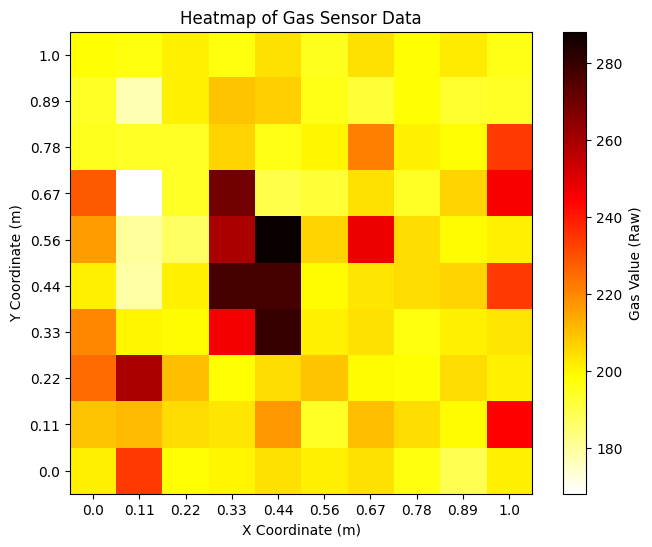

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the simulated data
file_path = "D:\Downloads\IoT\project\MQ2 sensor\Simulated_Gas_Sensor_Data.csv"  
data = pd.read_csv(file_path)

# Pivot the data to create a grid for the heatmap
heatmap_data = data.pivot(index="Y (m)", columns="X (m)", values="Gas Value (Raw)")

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap_data, cmap='hot_r', interpolation='nearest', origin='lower')

# Add labels and a colorbar
plt.colorbar(label="Gas Value (Raw)")
plt.title("Heatmap of Gas Sensor Data")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.xticks(np.arange(heatmap_data.columns.size), labels=np.round(heatmap_data.columns, 2))
plt.yticks(np.arange(heatmap_data.index.size), labels=np.round(heatmap_data.index, 2))
plt.grid(False)
plt.show()


In [4]:
data.head()

,X (m),Y (m),Gas Value (Raw)
0,0.0,0.00,201
1,0.0,0.11,209
2,0.0,0.22,225
3,0.0,0.33,220
4,0.0,0.44,201


# Heat Maps visualising the 1m by 1m square space and the interest zone representing our Land Mine #

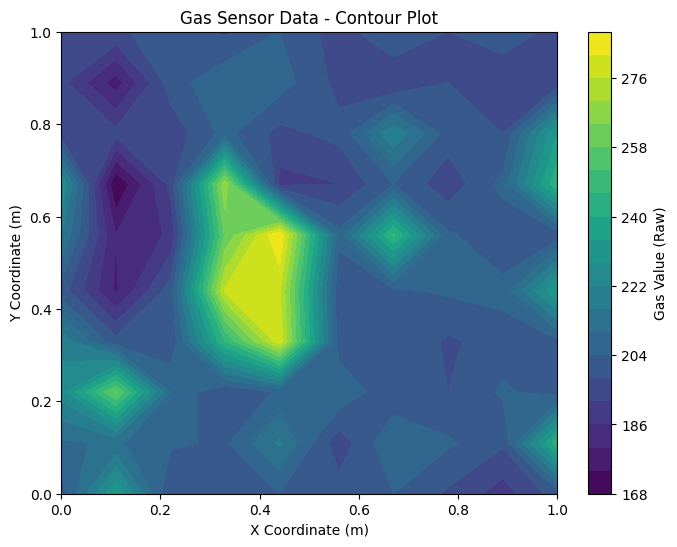

In [5]:
# Pivot data for grid
heatmap_data = data.pivot(index="Y (m)", columns="X (m)", values="Gas Value (Raw)")

# Generate the contour plot
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(heatmap_data.columns, heatmap_data.index)
Z = heatmap_data.values
contour = plt.contourf(X, Y, Z, cmap="viridis", levels=20)

# Add a colorbar and labels
plt.colorbar(contour, label="Gas Value (Raw)")
plt.title("Gas Sensor Data - Contour Plot")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.show()

In [7]:
def generate_synthetic_data_with_noise(data, threshold=270, n_sets=100):
    """
    Generate synthetic gas sensor data with noise and landmine detection threshold.

    Parameters:
        data (pd.DataFrame): Original dataset with 'X', 'Y', 'Gas Value (Raw)', etc.
        red_zones (list of tuples): Regions with higher gas concentrations (x_min, x_max, y_min, y_max).
        threshold (int): Gas Value threshold for potential landmine detection.
        n_sets (int): Number of synthetic datasets to generate.

    Returns:
        pd.DataFrame: Combined synthetic dataset with noise and features.
    """
    synthetic_data_sets = []
    
    for i in range(1, n_sets + 1):
        # Copy base data
        new_data = data.copy()
        
        # Add synthetic Unit Time incrementally
        new_data['Unit Time'] = np.arange(1, len(new_data) + 1)
        
        # Add small noise to Gas Value
        new_data['Gas Value (Raw)'] += np.random.randint(-5, 5, size=len(new_data))
        
        # Add a detection flag for potential landmine gas
        new_data['Nefarious gas detected'] = new_data['Gas Value (Raw)'].apply(lambda x: 1 if x > threshold else 0)
        
        # Clip Gas Value (Raw) for consistency
        new_data['Gas Value (Raw)'] = new_data['Gas Value (Raw)'].clip(lower=0).astype(int)
        
        # Append to the list of datasets
        synthetic_data_sets.append(new_data)
    
    # Concatenate all datasets into a single file
    combined_data = pd.concat(synthetic_data_sets, ignore_index=True)
    combined_data.to_csv("synthetic_gas_data_with_threshold.csv", index=False)
    print("Synthetic data with noise and threshold saved to 'synthetic_gas_data_with_threshold.csv'")
    
    return combined_data

# Load the base dataset
file_path = "D:\Downloads\IoT\project\MQ2 sensor\Simulated_Gas_Sensor_Data.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Generate the synthetic data with noise and landmine detection threshold
synthetic_data = generate_synthetic_data_with_noise(data, threshold=270, n_sets=10)
print("Synthetic data generation complete.")


<>:43: SyntaxWarning: invalid escape sequence '\D'
<>:43: SyntaxWarning: invalid escape sequence '\D'
C:\Windows\Temp\ipykernel_12140\272066071.py:43: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Downloads\IoT\project\MQ2 sensor\Simulated_Gas_Sensor_Data.csv"  # Replace with your dataset path


Synthetic data with noise and threshold saved to 'synthetic_gas_data_with_threshold.csv'
Synthetic data generation complete.


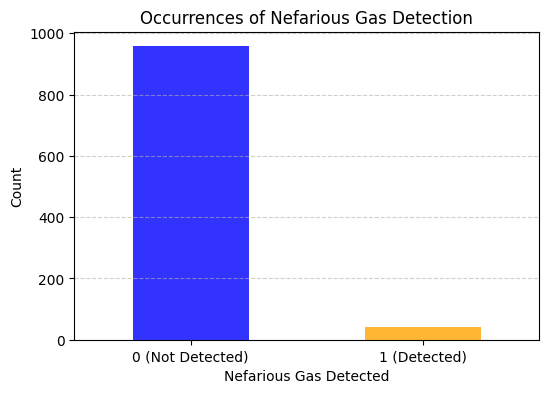

Occurrences of Nefarious Gas Detection:
Not Detected (0): 957
Detected (1): 43


In [8]:
# Count occurrences of 1 and 0 in the 'Nefarious gas detected' column
counts = synthetic_data['Nefarious gas detected'].value_counts()

# Plot a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.title("Occurrences of Nefarious Gas Detection")
plt.xlabel("Nefarious Gas Detected")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["0 (Not Detected)", "1 (Detected)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


counts_dict = counts.to_dict()

print("Occurrences of Nefarious Gas Detection:")
for key, value in counts_dict.items():
    status = "Detected" if key == 1 else "Not Detected"
    print(f"{status} ({key}): {value}")


# Random Oversampling technique to regulize and balance the Data #

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Windows\Temp\ipykernel_12140\890401411.py:4: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Downloads\IoT\project\MQ2 sensor\synthetic_gas_data_with_threshold.csv"


Class distribution after random oversampling:
Not Detected (0): 957
Detected (1): 957


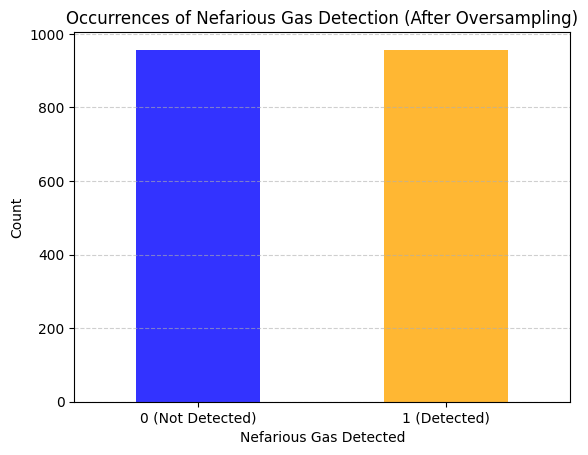

In [9]:
from imblearn.over_sampling import RandomOverSampler

# Reload the dataset
file_path = "D:\Downloads\IoT\project\MQ2 sensor\synthetic_gas_data_with_threshold.csv"
data = pd.read_csv(file_path)

# Define the feature matrix (X) and target variable (y)
X = data.drop(columns=['Nefarious gas detected'])  # All columns except the target
y = data['Nefarious gas detected']  # The target column

# Apply Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the resampled X and y into a single DataFrame
resampled_data = X_resampled.copy()
resampled_data['Nefarious gas detected'] = y_resampled

# Display the new class distribution
new_counts = resampled_data['Nefarious gas detected'].value_counts()
print("Class distribution after random oversampling:")
for label, count in new_counts.items():
    status = "Detected" if label == 1 else "Not Detected"
    print(f"{status} ({label}): {count}")

# Plot the new class distribution
new_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.title("Occurrences of Nefarious Gas Detection (After Oversampling)")
plt.xlabel("Nefarious Gas Detected")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["0 (Not Detected)", "1 (Detected)"], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Adding more Noise and amplifying outliers #


In [30]:
import numpy as np
import pandas as pd

def generate_synthetic_data_with_noise(data, threshold=270, n_sets=100):
    """
    Generate synthetic gas sensor data with noise and landmine detection threshold.

    Parameters:
        data (pd.DataFrame): Original dataset with 'X', 'Y', 'Gas Value (Raw)', etc.
        threshold (int): Gas Value threshold for potential landmine detection.
        n_sets (int): Number of synthetic datasets to generate.

    Returns:
        pd.DataFrame: Combined synthetic dataset with noise and features.
    """
    synthetic_data_sets = []
    
    for i in range(1, n_sets + 1):
        # Copy base data
        new_data = data.copy()
        
        # Add synthetic Unit Time incrementally
        new_data['Unit Time'] = np.arange(1, len(new_data) + 1)
        
        # Add small noise to Gas Value
        new_data['Gas Value (Raw)'] += np.random.randint(-5, 5, size=len(new_data))
        
        # Add a detection flag for potential landmine gas
        new_data['Nefarious gas detected'] = new_data['Gas Value (Raw)'].apply(lambda x: 1 if x > threshold else 0)
        
        # Clip Gas Value (Raw) for consistency
        new_data['Gas Value (Raw)'] = new_data['Gas Value (Raw)'].clip(lower=0).astype(int)
        
        # Append to the list of datasets
        synthetic_data_sets.append(new_data)
    
    # Concatenate all datasets into a single file
    combined_data = pd.concat(synthetic_data_sets, ignore_index=True)
    print("Synthetic data generation complete.")
    return combined_data

def add_outliers(data, outlier_percentage=0.05, outlier_magnitude=10):
    """
    Add intentional outliers to the dataset.

    Parameters:
        data (pd.DataFrame): The synthetic dataset to modify.
        outlier_percentage (float): Percentage of rows to introduce outliers.
        outlier_magnitude (float): Magnitude of the outliers.

    Returns:
        pd.DataFrame: Dataset with added outliers.
    """
    num_outliers = int(len(data) * outlier_percentage)
    outlier_indices = np.random.choice(data.index, size=num_outliers, replace=False)
    
    # Add outliers to numerical columns
    for col in data.columns:
        if data[col].dtype in ['float64', 'int64']:
            data.loc[outlier_indices, col] += np.random.normal(0, outlier_magnitude, size=num_outliers)
    
    print(f"Outliers added to {len(outlier_indices)} rows.")
    return data

# Load the base dataset
file_path = "D:\Downloads\IoT\project\MQ2 sensor\Simulated_Gas_Sensor_Data.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Generate the synthetic data with noise and landmine detection threshold
synthetic_data = generate_synthetic_data_with_noise(data, threshold=270, n_sets=10)

# Add intentional outliers
synthetic_data_with_outliers = add_outliers(synthetic_data, outlier_percentage=0.05, outlier_magnitude=10)

# Save the final dataset
synthetic_data_with_outliers.to_csv("synthetic_gas_data_with_outliers.csv", index=False)
print("Final dataset with outliers saved to 'synthetic_gas_data_with_outliers.csv'")


<>:66: SyntaxWarning: invalid escape sequence '\D'
<>:66: SyntaxWarning: invalid escape sequence '\D'
C:\Windows\Temp\ipykernel_12140\3099233403.py:66: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Downloads\IoT\project\MQ2 sensor\Simulated_Gas_Sensor_Data.csv"  # Replace with your dataset path


Synthetic data generation complete.
Outliers added to 50 rows.
Final dataset with outliers saved to 'synthetic_gas_data_with_outliers.csv'


C:\Windows\Temp\ipykernel_12140\3099233403.py:60: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ -8.94349913  -5.83959502  -5.35613338   8.56617105   5.15042673
   7.15658245   5.21379811  -5.93840162   6.97102856  11.82453827
   5.84503216   4.49655907  -7.67054507   2.11817079  -8.20241329
  -0.24027858 -16.40266639 -16.32558403  -1.9104769   -5.48439672
   2.06787193  -1.34768579   0.30190787   6.08607442  -4.63268956
  -2.19443812  14.55021223   0.03084127  -1.79210475   0.82512699
  -1.61364373  -7.09572293  -9.98029837  -7.6343134    8.72919187
  -6.29905255  -1.54924602   7.00736285  -2.78391171   6.33361315
 -15.40793042  -1.3251668    0.78896097   0.23138723 -16.52918698
  12.03112646  -8.54672945   3.35037125   0.07964283  10.03709524]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[outlier_indices, col] += np.random.normal(0, outlier_magnitud

# Logistic Regression Model #

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Windows\Temp\ipykernel_12140\1901496197.py:11: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\Downloads\IoT\project\MQ2 sensor\synthetic_gas_data_with_threshold.csv')



Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       103
           1       0.60      0.55      0.57        97

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



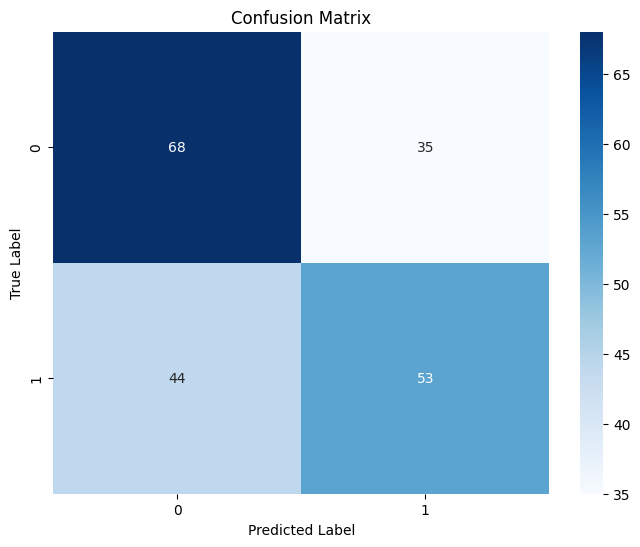

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('D:\Downloads\IoT\project\MQ2 sensor\synthetic_gas_data_with_threshold.csv')

# Create binary classes based on gas value threshold
# Using median as threshold to create balanced classes
threshold = data['Gas Value (Raw)'].median()
data['gas_class'] = (data['Gas Value (Raw)'] > threshold).astype(int)

# Prepare features and target
X = data[['X (m)', 'Y (m)']]
y = data['gas_class']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model with regularization
model = LogisticRegression(
    C=1.0,  # Inverse of regularization strength
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print model evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize decision boundary
def plot_decision_boundary(X, y, model, scaler):
    plt.figure(figsize=(10, 8))
    
    # Create a mesh grid
    x_min, x_max = X['X (m)'].min() - 0.1, X['X (m)'].max() + 0.1
    y_min, y_max = X['Y (m)'].min() - 0.1, X['Y (m)'].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Scale the mesh grid
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    
    # Make predictions
    Z = model.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot training points
    scatter = plt.scatter(X['X (m)'], X['Y (m)'], c=y, alpha=0.8)
    plt.colorbar(scatter)
    
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()



# Explore more models in order to compare and benchmark the results #

c:\Users\SOUAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\SOUAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\SOUAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\SOUAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 


Model Comparison:
                    Model      RMSE        R2  CV Mean R2  CV Std R2
Support Vector Regression 31.505604 -0.134391   -0.068707   0.052867
            Random Forest 23.210542  0.384316   -0.157489   0.724731
        Gradient Boosting 25.981332  0.228546   -0.622393   1.487025
      K-Nearest Neighbors 22.341844  0.429540   -0.157376   0.215980
           Neural Network 34.112003 -0.329846   -0.294515   0.245678


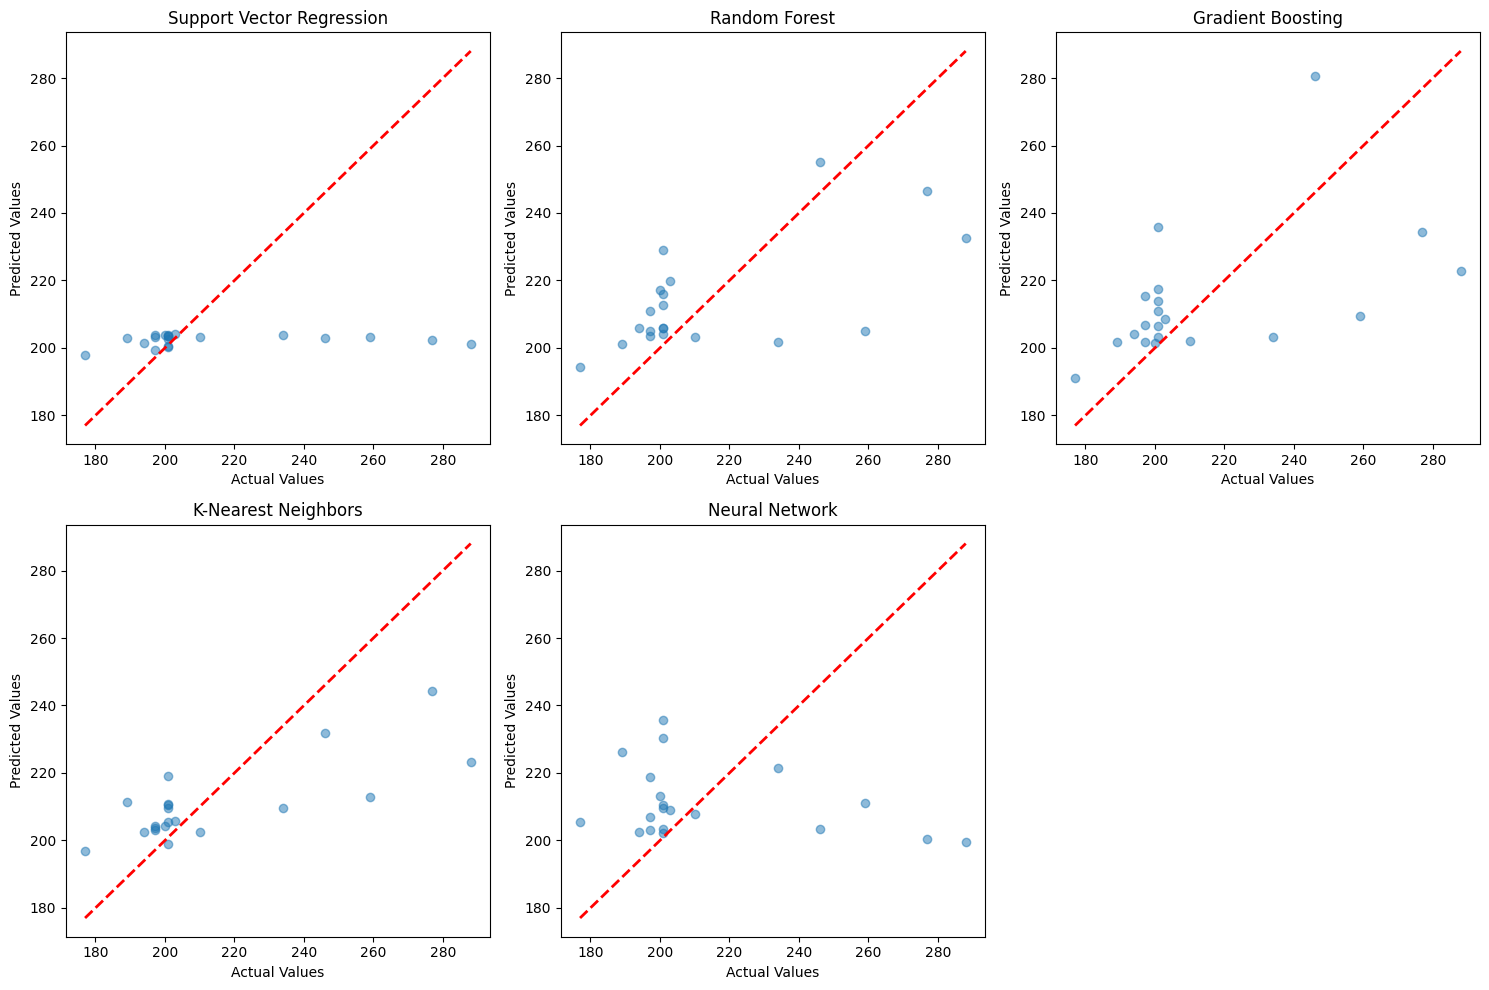


Random Forest Feature Importance:
   Feature  Importance
X Position     0.53377
Y Position     0.46623


c:\Users\SOUAD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


AttributeError: PathCollection.set() got an unexpected keyword argument 'edcolors'

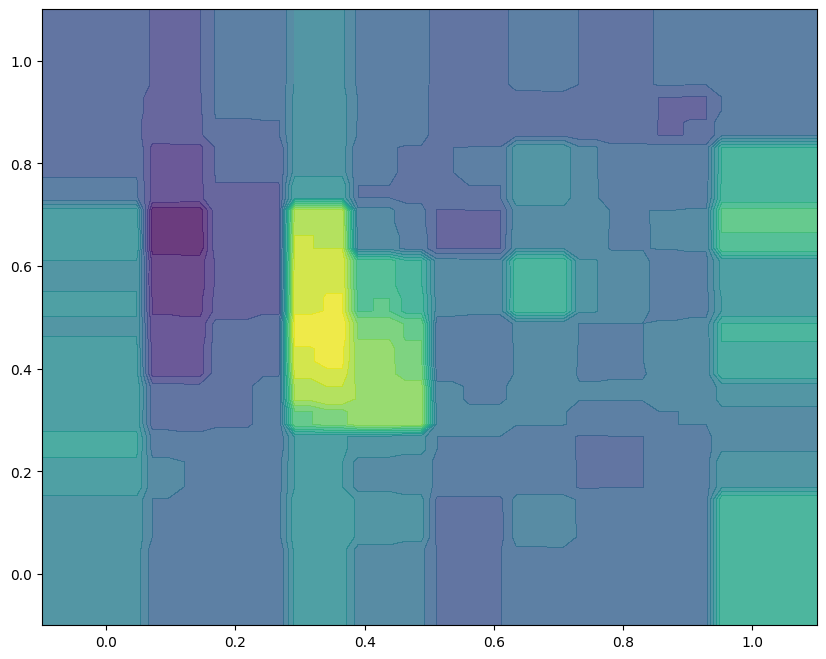

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv('Simulated_Gas_Sensor_Data.csv')
X = data[['X (m)', 'Y (m)']]
y = data['Gas Value (Raw)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'R2': r2,
        'CV Mean R2': cv_scores.mean(),
        'CV Std R2': cv_scores.std()
    }

# Evaluate all models
results = []
predictions = {}

for name, model in models.items():
    result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results.append(result)
    predictions[name] = model.predict(X_test_scaled)

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.to_string(index=False))

# Visualize predictions vs actual
plt.figure(figsize=(15, 10))
for i, (name, pred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'{name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': ['X Position', 'Y Position'],
    'Importance': rf_model.feature_importances_
})
print("\nRandom Forest Feature Importance:")
print(feature_importance.to_string(index=False))

# Create 2D prediction surface for best model
def plot_prediction_surface(model, scaler, X, y):
    x_min, x_max = X['X (m)'].min() - 0.1, X['X (m)'].max() + 0.1
    y_min, y_max = X['Y (m)'].min() - 0.1, X['Y (m)'].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                        np.linspace(y_min, y_max, 50))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_scaled = scaler.transform(grid_points)
    Z = model.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, levels=20, cmap='viridis', alpha=0.8)
    scatter = plt.scatter(X['X (m)'], X['Y (m)'], c=y, cmap='viridis', 
                         edcolors='white', linewidth=0.5)
    plt.colorbar(scatter)
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.title('Prediction Surface')
    plt.show()

# Plot prediction surface for Random Forest
plot_prediction_surface(rf_model, scaler, X, y)

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Windows\Temp\ipykernel_12140\1901496197.py:11: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\Downloads\IoT\project\MQ2 sensor\synthetic_gas_data_with_threshold.csv')



Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       103
           1       0.60      0.55      0.57        97

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200



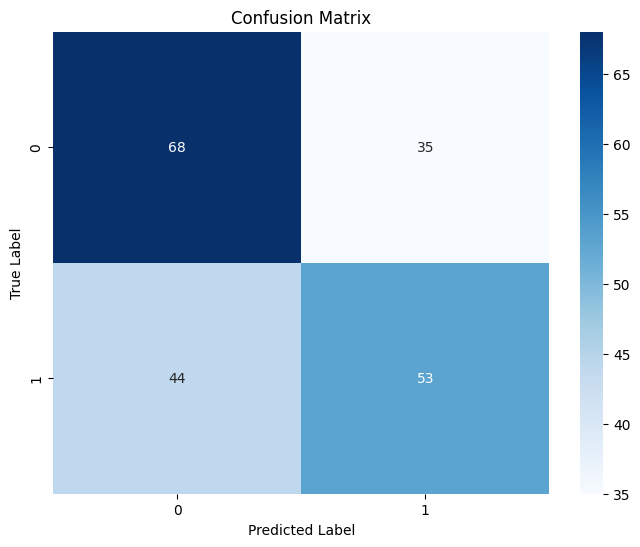

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('D:\Downloads\IoT\project\MQ2 sensor\synthetic_gas_data_with_threshold.csv')

# Create binary classes based on gas value threshold
# Using median as threshold to create balanced classes
threshold = data['Gas Value (Raw)'].median()
data['gas_class'] = (data['Gas Value (Raw)'] > threshold).astype(int)

# Prepare features and target
X = data[['X (m)', 'Y (m)']]
y = data['gas_class']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model with regularization
model = LogisticRegression(
    C=1.0,  # Inverse of regularization strength
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print model evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize decision boundary
def plot_decision_boundary(X, y, model, scaler):
    plt.figure(figsize=(10, 8))
    
    # Create a mesh grid
    x_min, x_max = X['X (m)'].min() - 0.1, X['X (m)'].max() + 0.1
    y_min, y_max = X['Y (m)'].min() - 0.1, X['Y (m)'].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Scale the mesh grid
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    
    # Make predictions
    Z = model.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot training points
    scatter = plt.scatter(X['X (m)'], X['Y (m)'], c=y, alpha=0.8)
    plt.colorbar(scatter)
    
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

